In [1]:
# All the library using on this dataset.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # The most important library using on this project
from sklearn.metrics import r2_score
# The library to manipulation , cleaning the source dataset
import numpy as np
import pandas as pd
import seaborn as sns # Library to visualization clarity 
import matplotlib.pyplot as plt # The library to compare the final result found it.



In [2]:
# Reading the data as dataframe by auxliar from pandas library
# Below we have describtion from the data for better understanding the situation , printing the
# shape, information, description and erasing the useless values.
car_price = 'C:/Users/User/OneDrive/Python/dataset/curso-machine-learning-main/curso-machine-learning-main/data/car_data.csv'
data = pd.read_csv(car_price)
data.sample(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
90,corolla altis,2009,3.80,18.61,62000,Petrol,Dealer,Manual,0
68,corolla altis,2011,4.35,13.74,88000,Petrol,Dealer,Manual,0
74,etios cross,2014,4.90,8.93,83000,Diesel,Dealer,Manual,0
265,jazz,2017,6.50,8.70,21200,Petrol,Dealer,Manual,0
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
221,i20,2013,4.50,6.79,32000,Petrol,Dealer,Automatic,0
46,ritz,2013,2.65,4.89,64532,Petrol,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
195,Bajaj ct 100,2015,0.18,0.32,35000,Petrol,Individual,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Seaborn library to data analysis

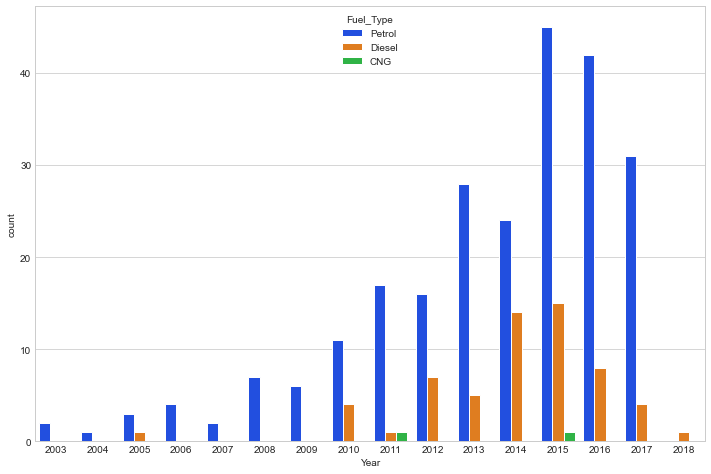

In [7]:

# On this cell we make use from the powerfull library seaborn for better understaing by graphs from the dataset.
plt.style.use('seaborn-whitegrid')
sns.set_palette('bright') 
plt.figure(figsize=(12,8))
sns.countplot(x="Year", hue= 'Fuel_Type', edgecolor="1", data=data)
plt.show()




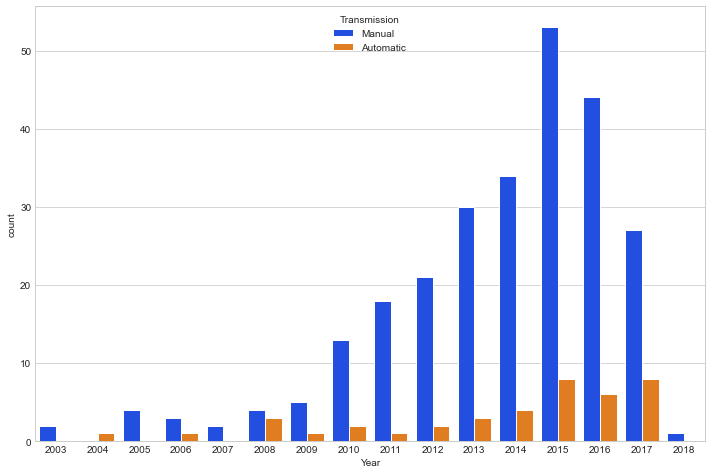

In [8]:


plt.figure(figsize=(12,8))
sns.countplot(x="Year", hue= 'Transmission', edgecolor="1",  data=data)
plt.show()



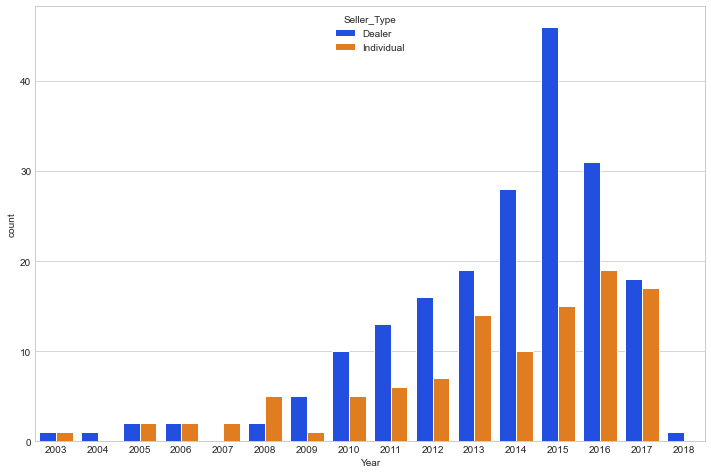

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="Year", hue= 'Seller_Type', edgecolor="1", data=data)
plt.show()

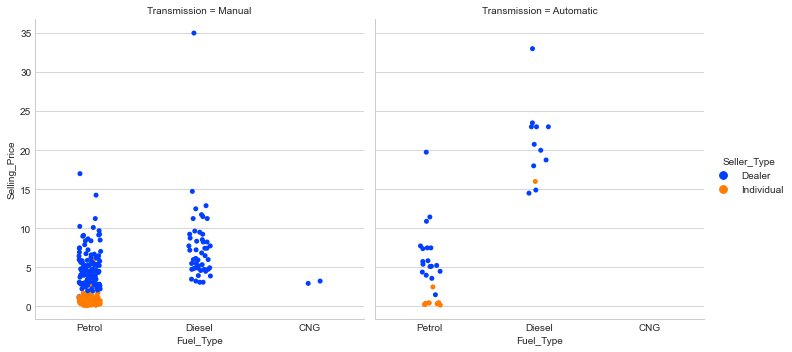

In [10]:
sns.catplot(x="Fuel_Type", y="Selling_Price", hue = 'Seller_Type', col = 'Transmission',  kind = 'strip', data = data)
plt.show()

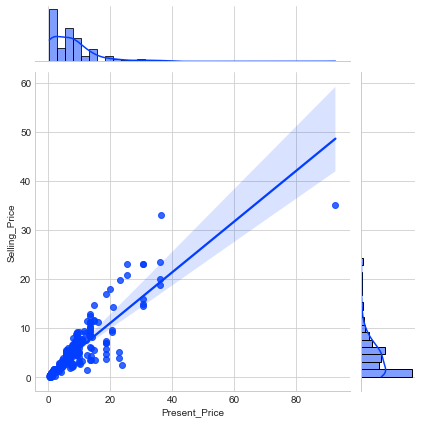

In [11]:
sns.jointplot(x="Present_Price", y="Selling_Price", kind = 'reg', data=data)
plt.show()

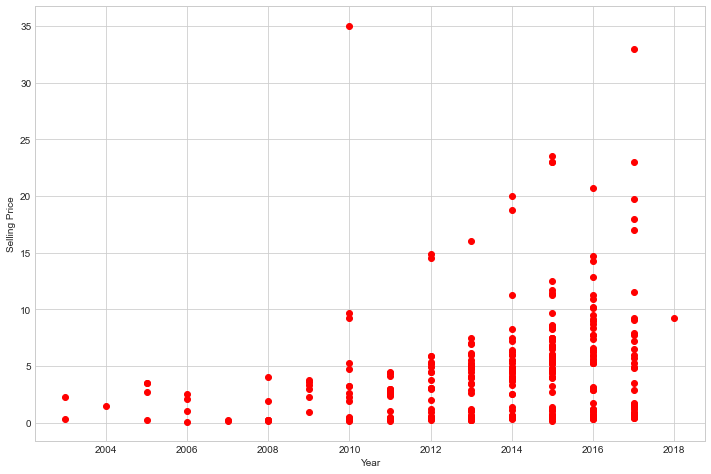

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(data['Year'], data['Selling_Price'],  color='red')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()
#  On this samples as shown , we have a large increased of selling price between 2014 and 2017

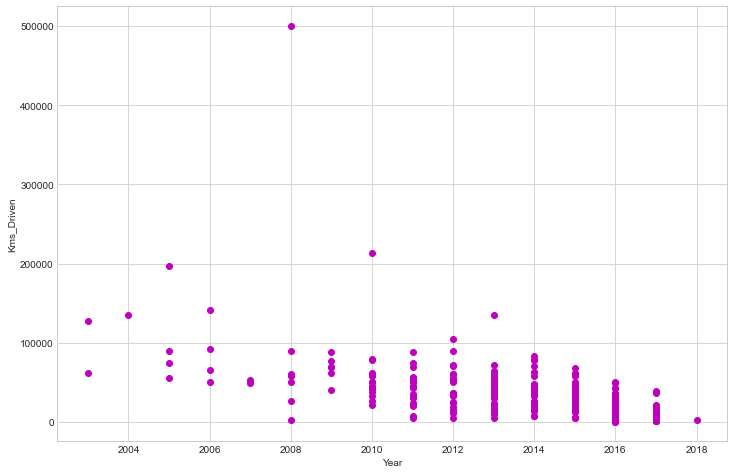

In [13]:

plt.figure(figsize=(12,8))
plt.scatter(data['Year'], data['Kms_Driven'],  color='m')
plt.xlabel("Year")
plt.ylabel("Kms_Driven")
plt.show()
# For curiosity and contrast from the plot above, since the selling price growth , the necessity and 
# utilify from the vehicules goes down.



In [14]:
data['Transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace=True)
data['Seller_Type'].replace({'Dealer': 0, 'Individual': 1}, inplace=True)
data['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2}, inplace=True)
data.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
127,Bajaj Avenger 150,2016,0.75,0.80,7000,0,1,0,0
32,swift,2014,4.95,7.49,39000,1,0,0,0
270,city,2011,4.10,10.00,69341,0,0,0,0
0,ritz,2014,3.35,5.59,27000,0,0,0,0
20,alto k10,2016,2.85,3.95,25000,0,0,0,0
289,city,2016,10.11,13.60,10980,0,0,0,0
265,jazz,2017,6.50,8.70,21200,0,0,0,0
37,800,2003,0.35,2.28,127000,0,1,0,0
230,verna,2013,6.15,9.40,45000,1,0,0,0
229,i20,2012,3.10,6.79,52132,1,0,0,0


In [15]:
y = data[['Selling_Price']]
X = data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Train')
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

print('\nTest')
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

Train
X_train:  (225, 7)
y_train:  (225, 1)

Test
X_test:  (76, 7)
y_test:  (76, 1)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

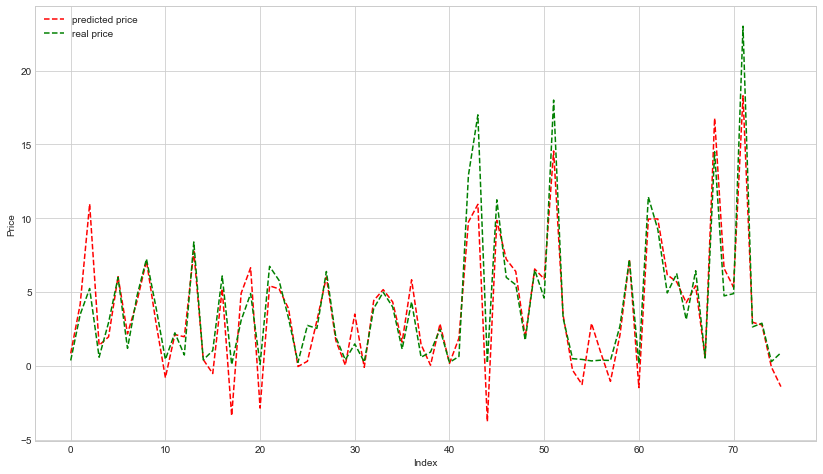

In [18]:

plt.figure(figsize=(14,8))
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['predicted price', 'real price'])
plt.ylabel('Price')
plt.xlabel('Index')

plt.show()



In [19]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8483463634198904
